In [2]:

# Set Repo Mirror
local({
  r <- getOption("repos")
  r["CRAN"] <- "http://archive.linux.duke.edu/cran/"
  options(repos = r)
})

In [3]:
install.packages('wbstats')

package 'wbstats' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\595559\AppData\Local\Temp\RtmpEFeg4r\downloaded_packages


In [27]:
#https://cran.r-project.org/web/packages/wbstats/vignettes/Using_the_wbstats_package.html
library(wbstats)
library(ggplot2)


str(wb_cachelist, max.level = 1)

List of 7
 $ countries  :'data.frame':	304 obs. of  18 variables:
 $ indicators :'data.frame':	16978 obs. of  7 variables:
 $ sources    :'data.frame':	43 obs. of  8 variables:
 $ datacatalog:'data.frame':	238 obs. of  29 variables:
 $ topics     :'data.frame':	21 obs. of  3 variables:
 $ income     :'data.frame':	7 obs. of  3 variables:
 $ lending    :'data.frame':	4 obs. of  3 variables:


In [42]:
# Import Oil Data and Add Indicator

oil_data <- wb(indicator = c("CRUDE_DUBAI", "CRUDE_BRENT", "CRUDE_WTI", "CRUDE_PETRO"),
               startdate = "2012M01", enddate = "2014M12", freq = "M", POSIXct = TRUE)

oil_data$indicator_stripped = gsub(", \\$/bbl, nominal\\$", "", oil_data$indicator)

print(unique(oil_data$indicator_stripped))
print(unique(oil_data$indicator))
#print(summary(oil_data))
#print(head(oil_data))

[1] "Crude oil, Dubai"     "Crude oil, Brendt"    "Crude oil, WTI"      
[4] "Crude oil, avg, spot"
[1] "Crude oil, Dubai, $/bbl, nominal$"    
[2] "Crude oil, Brendt, $/bbl, nominal$"   
[3] "Crude oil, WTI, $/bbl, nominal$"      
[4] "Crude oil, avg, spot, $/bbl, nominal$"


In [55]:

ggplot(oil_data, aes(x = date_ct, y = value, colour = indicator_stripped)) + geom_line(size = 1) +
  labs(title = "Crude Oil Price Comparisons", x = "Date", y = "US Dollars") + theme_classic() +
theme(legend.position='top',legend.title='Indicator') + 
scale_y_continuous(labels = scales::dollar,limits=c(50,140))


ERROR: Error in (function (el, elname) : Element legend.title must be a element_text object.


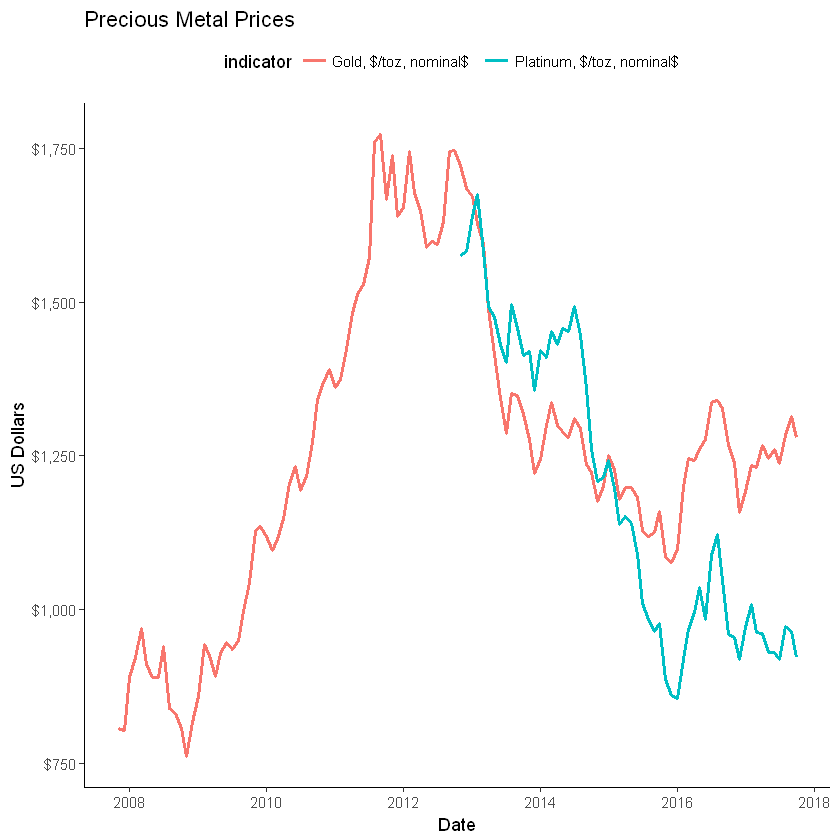

In [51]:
# querying seperate for differing time coverage example
gold_data <- wb(indicator = "GOLD", mrv = 120, freq = "M", POSIXct = TRUE)
plat_data <- wb(indicator = "PLATINUM", mrv = 60, freq = "M", POSIXct = TRUE)

metal_data <- rbind(gold_data, plat_data)

ggplot(metal_data, aes(x = date_ct, y = value, colour = indicator)) + geom_line(size = 1) +
  labs(title = "Precious Metal Prices", x = "Date", y = "US Dollars") + theme_classic() + theme(legend.position='top') + scale_y_continuous(labels = scales::dollar)